**Problem Statements**

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Load Datasets**

In [50]:
data=pd.read_csv("Advertising.csv")

In [51]:
data

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [52]:
#drop the unnamed column
data.drop('Unnamed: 0',axis=1,inplace=True)

In [53]:
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


**Basic checks**

In [54]:
data.shape

(200, 4)

In [55]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [56]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [57]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [58]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [60]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [61]:
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**EDA**

**Univariate analysis**

In [68]:
#distribution of TV
import seaborn as sns
print(sns.__version__)

0.13.2


<Axes: ylabel='Density'>

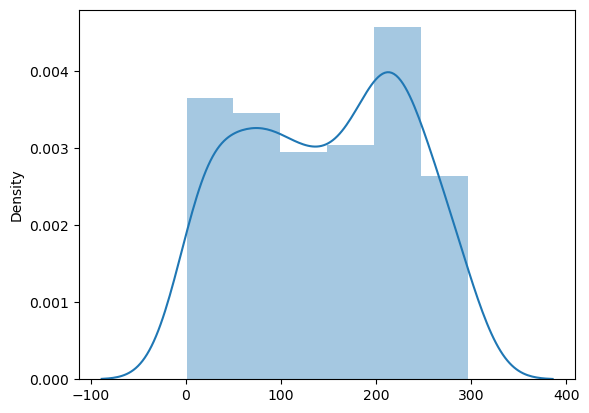

In [70]:
sns.distplot(x=data.TV,kde=True)

<Axes: ylabel='Density'>

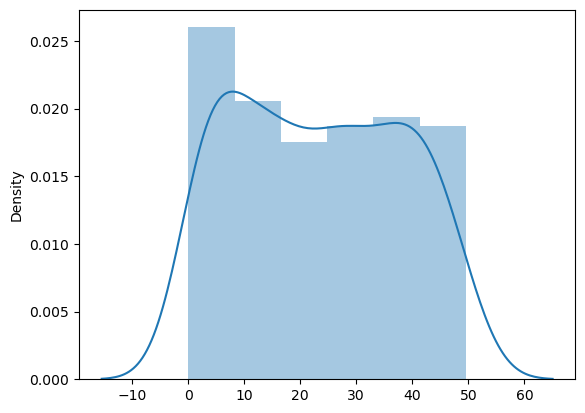

In [71]:
sns.distplot(x=data.Radio,kde=True)

<Axes: ylabel='Density'>

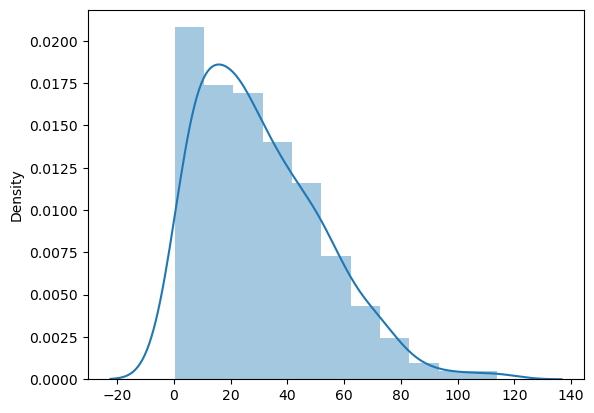

In [72]:
sns.distplot(x=data.Newspaper,kde=True)

**Bivariate Analysis**

<Axes: xlabel='TV', ylabel='Sales'>

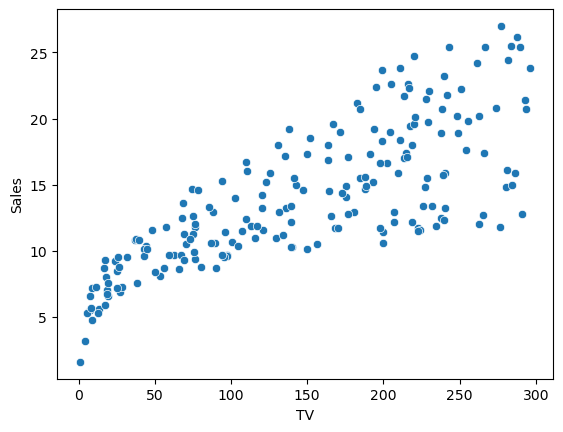

In [73]:
#Analyse how amount had spent on TV impact sales
sns.scatterplot(data=data,x='TV',y='Sales')

<Axes: xlabel='Radio', ylabel='Sales'>

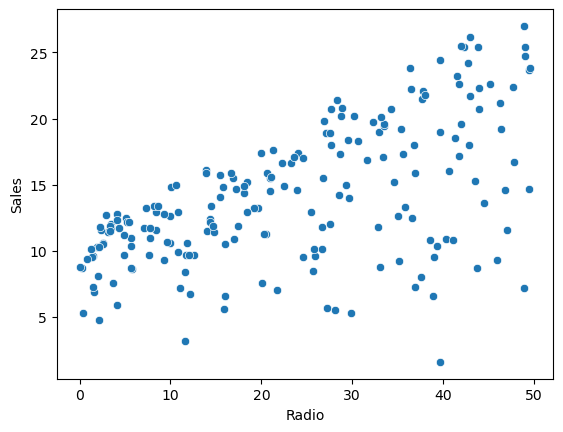

In [74]:
sns.scatterplot(data=data,x='Radio',y='Sales')

<Axes: xlabel='Newspaper', ylabel='Sales'>

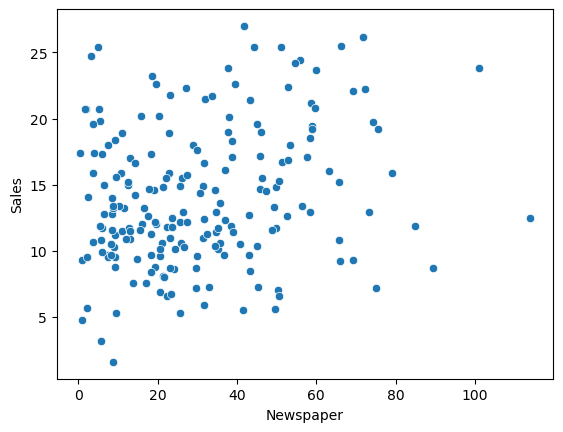

In [75]:
sns.scatterplot(data=data,x='Newspaper',y='Sales')

**Multivariate analysis**

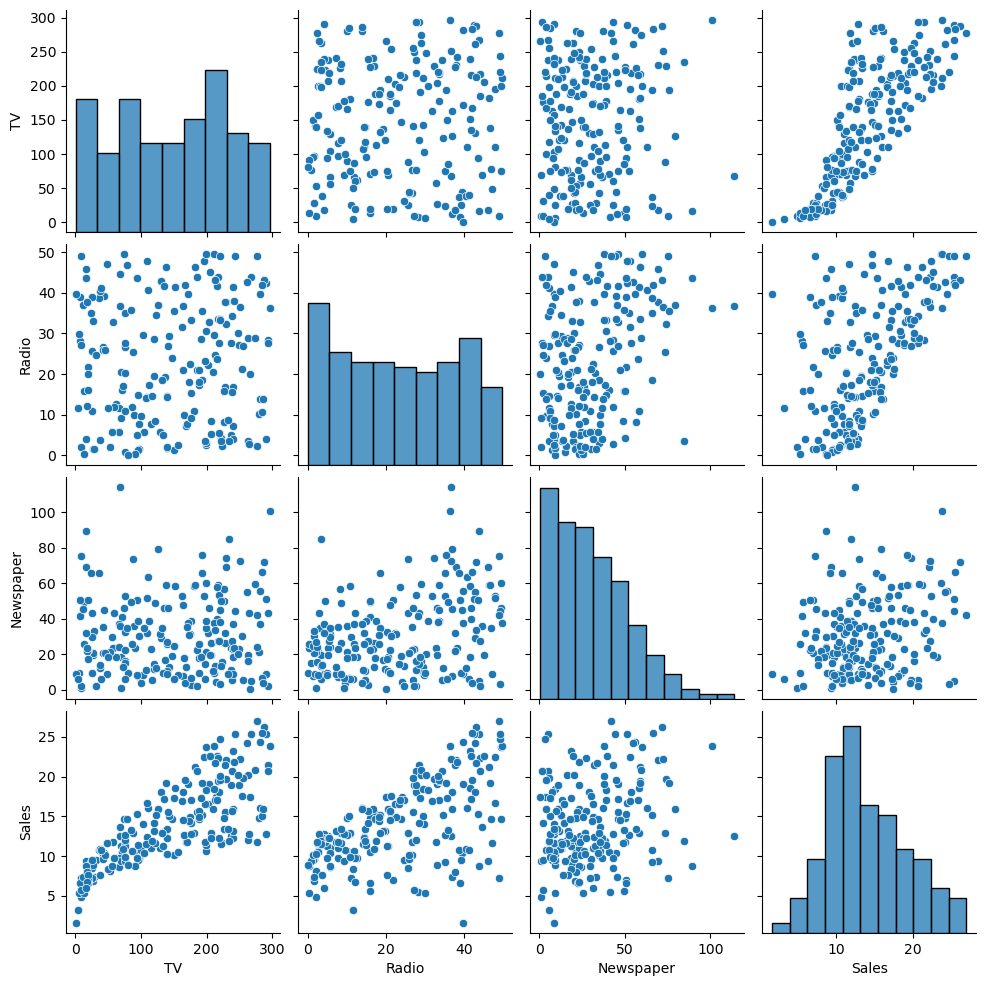

In [76]:
sns.pairplot(data)

In [79]:
data.Sales.skew()

np.float64(0.4075714250767127)

**Data Preproccessing**

In [80]:
#check ur missing values
data.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

**Check Duplicates**

In [82]:
data.duplicated().sum()

np.int64(0)

In [83]:
data.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

**Check Outliers**

<Axes: xlabel='TV'>

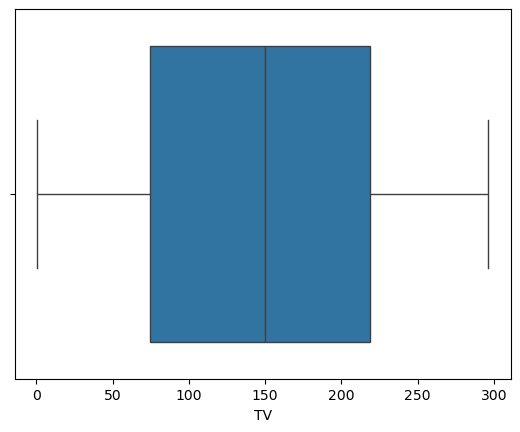

In [85]:
sns.boxplot(x=data.TV)

<Axes: xlabel='Radio'>

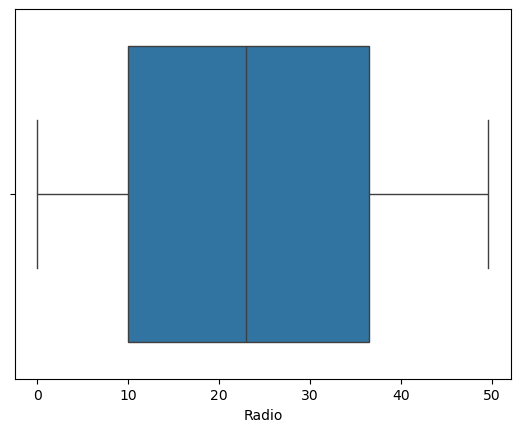

In [86]:
sns.boxplot(x=data.Radio)

<Axes: xlabel='Newspaper'>

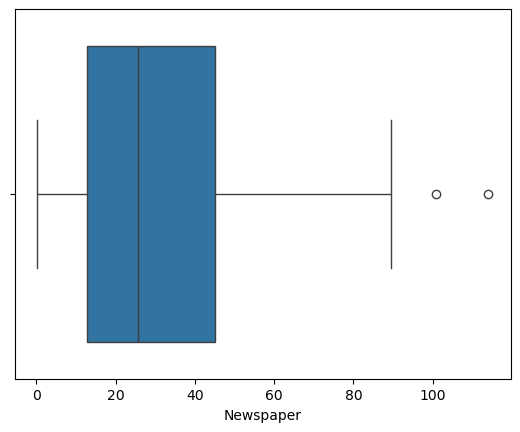

In [87]:
sns.boxplot(x=data.Newspaper)

<Axes: xlabel='Sales'>

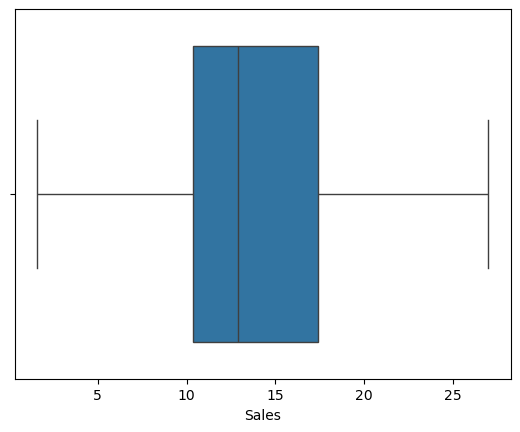

In [88]:
sns.boxplot(x=data.Sales)

In [90]:
# Find Q1 and Q3
Q1=data['Newspaper'].quantile(0.25)
print("lower quantile",Q1)
Q3=data['Newspaper'].quantile(0.75)
print("Upper quantile",Q3)

lower quantile 12.75
Upper quantile 45.1


In [91]:
#Find IQR
IQR=Q3-Q1
IQR

np.float64(32.35)

In [93]:
# Find upper limits and lower limits
lower_limit=Q1-1.5*IQR
print("lower limit is",lower_limit)
upper_limit=Q3+1.5*IQR
print("upper limit is",upper_limit)

lower limit is -35.775000000000006
upper limit is 93.625


In [96]:
#Find value above upper limit
data.loc[data['Newspaper']>upper_limit]

,TV,Radio,Newspaper,Sales
16,67.8,36.6,114.0,12.5
101,296.4,36.3,100.9,23.8


In [98]:
len(data.loc[data['Newspaper']>upper_limit])/len(data)

0.01

In [97]:
#Find value below lower limit
data.loc[data['Newspaper']<lower_limit]

,TV,Radio,Newspaper,Sales


In [101]:
#How to handle outliers
#if data is not normal,replace outlier with median
data.loc[data['Newspaper']>upper_limit,"Newspaper"]=data['Newspaper'].median()

<Axes: xlabel='Newspaper'>

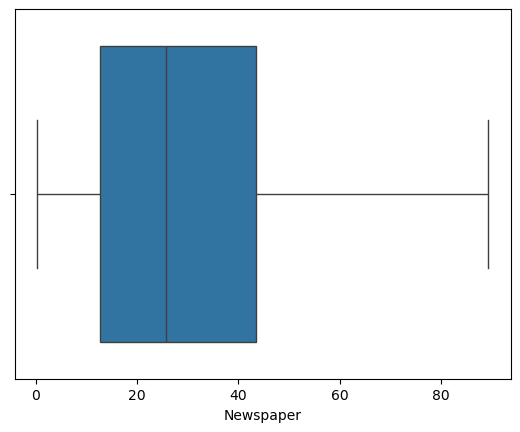

In [102]:
sns.boxplot(x=data.Newspaper)

In [103]:
#Skipping scaling

In [104]:
#Skipping converting catagorical data into numerical data

**Feature Engineering**


In [106]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.048462,0.782224
Radio,0.054809,1.000000,0.343141,0.576223
Newspaper,0.048462,0.343141,1.000000,0.215938
Sales,0.782224,0.576223,0.215938,1.000000


<Axes: >

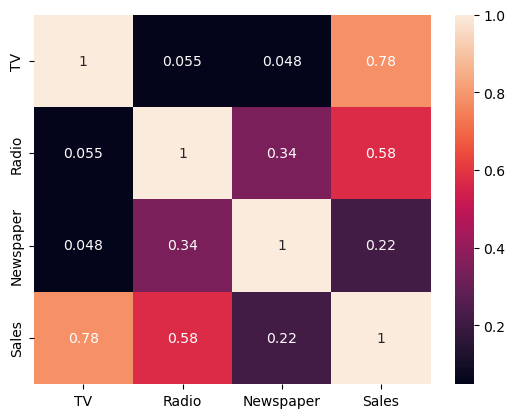

In [107]:
sns.heatmap(data.corr(),annot=True)

<Axes: >

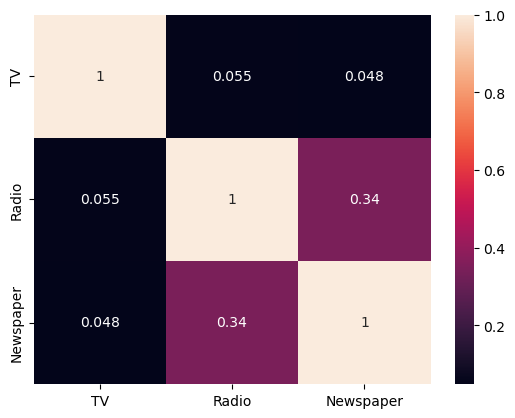

In [108]:
#checking for multicolinearity
sns.heatmap(data.drop("Sales",axis=1).corr(),annot=True)

**Split data with x and y**

In [109]:
x=data.drop("Sales",axis=1)
y=data['Sales']

**Split data for testing and training**

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=4)

In [111]:
x_train.shape

(140, 3)

In [112]:
x_test.shape

(60, 3)

In [113]:
y_train.shape

(140,)

In [114]:
y_test.shape

(60,)

**Model Building**

In [116]:
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [117]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [119]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression
# Initialize model
model=LinearRegression()
# Train model with x_train and y_train
model.fit(x_train,y_train)

LinearRegression()

In [120]:
#Make prediction/test model
y_pred=model.predict(x_test)
y_pred

array([17.11920196, 16.86343137, 21.80867738, 24.55443423, 12.3155194 ,
       20.92742165, 10.10412313, 12.37902465, 11.99570844, 16.95369111,
       22.81007152, 15.1981792 ,  8.4657263 , 14.88506108, 18.54549016,
       18.5612111 , 18.70116245, 14.50770633,  9.74439917, 20.58825997,
       14.89035187, 17.71204411, 23.05479076,  7.72066599, 21.4435882 ,
       19.61759881, 13.81348356, 11.64299601, 18.42933279, 12.21072397,
       11.41183731,  9.96393166, 13.49958752, 15.19317807, 18.10601562,
        6.92406996, 14.20072023, 14.27620674, 14.10646271, 10.77352628,
       14.84385103, 11.94916737, 10.70309421, 10.40075312,  6.20529208,
       16.82109527, 16.46119818, 12.07762468, 10.73444639, 20.86473587,
       15.08126005, 15.41063402, 12.79667983, 14.11738167, 12.36964978,
        9.02390838, 20.50392858,  9.34145403,  5.36475925,  8.24787047])

In [121]:
y_test

11     17.4
99     17.2
128    24.7
175    27.0
1      10.4
111    21.8
90     11.2
177    11.7
88     12.9
187    17.3
61     24.2
199    13.4
191     9.9
123    15.2
184    17.6
188    15.9
33     17.4
171    14.5
138     9.6
84     21.7
81     12.3
102    14.8
147    25.4
34      9.5
47     23.2
124    19.7
112    14.1
6      11.8
14     19.0
190    10.8
80     11.8
18     11.3
167    12.2
45     14.9
153    19.0
119     6.6
100    11.7
83     13.6
181    12.2
71     12.4
26     15.0
134    10.8
180    10.5
158     7.3
189     6.7
89     16.7
48     14.8
116    12.2
12      9.2
69     22.3
110    13.4
154    15.6
16     12.5
19     14.6
2       9.3
143    10.4
185    22.6
29     10.5
155     3.2
24      9.7
Name: Sales, dtype: float64

In [122]:
#slope/cofficient of x
model.coef_

array([0.04539939, 0.17757031, 0.00502354])

In [123]:
#Intercept
model.intercept_

np.float64(3.0901720352909177)